In [1]:
import sys
sys.path.append('C:\\Users\\helloliuzw\\Desktop\\Career_Platform\\')
sys.path.append('C:\\Users\\helloliuzw\\Desktop\\')
print(sys.path)
from Career_Platform.parser.label_classifier import KGClassifier,ExpRuleClassifier

['C:\\Users\\helloliuzw\\Desktop\\Career_Platform\\classifier', 'C:\\ProgramData\\Anaconda3\\python38.zip', 'C:\\ProgramData\\Anaconda3\\DLLs', 'C:\\ProgramData\\Anaconda3\\lib', 'C:\\ProgramData\\Anaconda3', '', 'C:\\Users\\helloliuzw\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\helloliuzw\\.ipython', 'C:\\Users\\helloliuzw\\Desktop\\Career_Platform\\', 'C:\\Users\\helloliuzw\\Desktop\\']


In [2]:
kgc = KGClassifier()
rulec = ExpRuleClassifier()
test_text = ['深圳 美都美容美发足浴公司 党支部 书记',
 '驻 香港 部队 步兵旅 司令部 作训 科长',
 '深圳市人民政府 办公厅 社会 一处 主任科员',
 '深圳市公安局 法制 处 四级 警长',
 '四川 煤炭 第一 建筑工程 公司 技术员 llz',
 '广州市L 第62中学O 辅导员P'
            ]

test_text2 = ['广州市L 第62中学O 辅导员P','广州市L 师范学校O 历史科S 学习P','黄埔港务局O 十年制学校O 教师P','局O 宣传科S 干事P','广东省L 纪委科员P']

test_text3 = ['深圳市政府办公厅O 副主任科员P']
for text in test_text3:
    res = kgc.classify(text,True)
    res2 = rulec.classify(text)
    print(res)
    print(res2)
    print('***********')

[]
['深圳', '市政府直属']
***********


In [3]:
a = ['深圳']
b = True
if a and b:
    print('great!')
print('done')

great!
done


In [ ]:
import re
text = '深圳L 广州O'
result = re.sub('[LOSP]','',text)
print(result)

## 字典测试

In [4]:
from SZlabeler.label_classifier import ExpRuleClassifier
import os
import time
location = r'C:\Users\helloliuzw\Desktop\parser'

text1 = '清华大学深圳研究院电子通信硕士'
text2 = '深圳市 审计局 政府 投资 审计 专业 局 审计 三处 主任科员'
text3 = '深圳市 无线电 管理局 综合处 处长'
text4 = '深圳市 无线电 管理 办公室 业务 处处长'

t0 = time.time()
label = ExpRuleClassifier()
print('Obj building Consuming:',time.time()-t0,'s')

print('\nSample Text:',text1)
t0 = time.time()
print(label.classify(text1))
print('Time Consuming:',time.time()-t0,'s')

print('\nSample Text:',text2)
t1 = time.time()
print(label.classify(text2))
print('Time Consuming:',time.time()-t1,'s')

print('\nSample Text:',text3)
t1 = time.time()
print(label.classify(text3))
print('Time Consuming:',time.time()-t1,'s')

print('\nSample Text:',text4)
t1 = time.time()
print(label.classify(text4))
print('Time Consuming:',time.time()-t1,'s')

Obj building Consuming: 0.0019958019256591797 s

Sample Text: 清华大学深圳研究院电子通信硕士
['双一流大学', '科技技术', '深圳', '理工方向1']
Time Consuming: 0.0009996891021728516 s

Sample Text: 深圳市 审计局 政府 投资 审计 专业 局 审计 三处 主任科员
['深圳']
Time Consuming: 0.0 s

Sample Text: 深圳市 无线电 管理局 综合处 处长
['深圳']
Time Consuming: 0.0 s

Sample Text: 深圳市 无线电 管理 办公室 业务 处处长
['深圳']
Time Consuming: 0.0 s


In [45]:
q1 = {'liu':True,'zw':False,'today':True}
q2 = {'here':False}
q3 = {'zw':True}
q4 = {}

In [46]:
w = {**q1,**q2}
e = {**q1,**q3}
r = {**q1,**q4}
print(w)
print(e)
print(r)

{'liu': True, 'zw': False, 'today': True, 'here': False}
{'liu': True, 'zw': True, 'today': True}
{'liu': True, 'zw': False, 'today': True}


In [6]:
print(w.get('here'))

False


In [7]:
r = {}
r['red'] = True
print(r)

{'red': True}


## 逻辑树

In [1]:
'''
A node is defined as:
    node_id:[final_output,input_id_list,output_reverse,logic]
for leaf node we can note it as:
    node_id:[final_output,key,output_reverse,None]
'''
tree = {'0':[True,[1,2],False,'and'],
        '1':[True,[3,4,5],False,'or'],
        '2':[True,'科技技术',False,None],
        '3':[True,'一般院校',False,None],
        '4':[True,'双一流大学',False,None],
        '5':[True,'海外名校',False,None]}

tree1 = {'0':[True,[1,2],False,'and'],
        '1':[True,[3,4,5],True,'and'],
        '2':[True,'科技技术',False,None],
        '3':[True,'一般院校',True,None],
        '4':[True,'双一流大学',True,None],
        '5':[True,'海外名校',True,None]}

tree2 = {'0':[True,'法务纪检',False,None]}


Final output: True
Python Expression: ((result_dict["一般院校"] or result_dict["双一流大学"] or result_dict["海外名校"]) and result_dict["科技技术"])


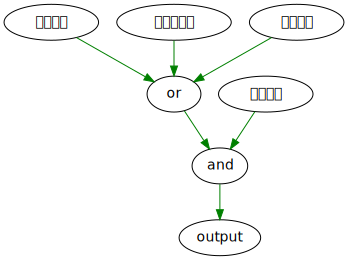

In [5]:
from graphviz import Digraph
import re
from SZlabeler.logic_tree import logictree

# result_d = {'一般院校':False,'双一流大学':True,'海外名校':False,'科技技术':True,'深圳':False}
# result_d = {'一般院校':False,'双一流大学':False,'海外名校':False,'科技技术':True,'深圳':False}
# result_d = {'一般院校':False,'双一流大学':True,'海外名校':False,'科技技术':False,'深圳':False}
result_d = {'一般院校':False,'双一流大学':False,'海外名校':True,'科技技术':True,'法务纪检':True,'深圳':True}

ltree = logictree(tree,result_d)
print('Final output:',ltree.getvalue())
print('Python Expression:',ltree.tree2exp())
ltree.show()

In [8]:
testtree = logictree(ltree.exp2tree('()'))
# testtree.show()

正确实例 ：("教育" and (not "科技") and ("经济" or "行政"))
错误示例1：("教育" and not "科技" and ("经济" or "行政"))
错误示例2：("教育" and (not "科技") and (("经济" or "行政")))


In [82]:
# expression 2 tree

expression = '(科技 and ((not 人文) and ((法律 or 纪检) and 深圳)) and 交通)'
if not expression.startswith('('):
    expression = '('+expression+')'
Llist = []
grade,maxgrade = 0,0
allnode = []
for i,ch in enumerate(expression):
    if ch=='(':
        Llist.append(i)
        grade += 1
    elif ch==')':
        maxgrade = max(grade,maxgrade)
        allnode.append([grade,expression[Llist.pop():i+1]])
        grade -= 1
allnode.reverse()
print('maxgrade',maxgrade)
print('grade',grade)
# allnode get, now depth tree
depthtree = {}
for i in range(1,maxgrade+1):
    depthtree[str(i)] = []
for i,node in enumerate(allnode):
    depthtree[str(node[0])].append([i,[],node[1]])
print('depthtree',depthtree)
# depthtree
for dep in range(1,maxgrade):
    for par in depthtree[str(dep)]:
        for chi in depthtree[str(dep+1)]:
            if chi[2] in par[2]:
                par[1].append(chi[0])
                par[2] = par[2].replace(chi[2],'',1)
print('depthtree',depthtree)                
# Real tree
nodelist = []
for L in depthtree.values():
    nodelist.extend(L)
print('nodelist',nodelist)
nodenum = len(nodelist)
tree = {}
for node in nodelist:
    node[2] = node[2][1:-1]
    parsed = node[2].split()
    notflag = False
    for operator in ['and','or']:
        if operator in parsed:
            logic = operator
            childL = node[2].split(' '+operator+' ')
    if 'not' in parsed:
        logic = 'None'
        notflag = True
        childL = node[2].split('not ')
    childL = [item.strip() for item in childL]
    childL = list(set(childL))
    if '' in childL:
        childL.remove('')
    print(childL)
    if notflag == True:
        tree[str(node[0])] = [True,childL[0],notflag,None]
        continue
    tree[str(node[0])] = [True,node[1],notflag,logic]
    for source in childL:
        tree[str(node[0])][1].append(nodenum)
        tree[str(nodenum)] = [True,source,notflag,None]
        nodenum += 1
    
print('tree',tree)
allnode

maxgrade 4
grade 0
depthtree {'1': [[0, [], '(科技 and ((not (人文 or 机械)) and ((法律 or 纪检) and 深圳)) and 交通)']], '2': [[1, [], '((not (人文 or 机械)) and ((法律 or 纪检) and 深圳))']], '3': [[2, [], '((法律 or 纪检) and 深圳)'], [4, [], '(not (人文 or 机械))']], '4': [[3, [], '(法律 or 纪检)'], [5, [], '(人文 or 机械)']]}
depthtree {'1': [[0, [1], '(科技 and  and 交通)']], '2': [[1, [2, 4], '( and )']], '3': [[2, [3], '( and 深圳)'], [4, [5], '(not )']], '4': [[3, [], '(法律 or 纪检)'], [5, [], '(人文 or 机械)']]}
nodelist [[0, [1], '(科技 and  and 交通)'], [1, [2, 4], '( and )'], [2, [3], '( and 深圳)'], [4, [5], '(not )'], [3, [], '(法律 or 纪检)'], [5, [], '(人文 or 机械)']]
['交通', '科技']
[]
['深圳']
[]


IndexError: list index out of range

In [9]:
lo = logictree(tree,result_d)
# lo.show()

In [37]:
er = '(5 and node and 6)'[1:-1]
print(type(er))

<class 'str'>


In [6]:
None1 = None or True
None11 = None or False
None2 = None and True
None22 = None and False
None3 = not None
print('None or True =',None1)
print('None or False =',None11)
print('None and True =',None2)
print('None and False =',None22)
print('not None =',None3)

None or True = True
None or False = False
None and True = None
None and False = None
not None = True


# KG clf测试

In [1]:
import numpy as np
import sklearn
from sklearn.datasets import load_digits
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from gensim.models import Word2Vec,KeyedVectors,FastText
from sklearn.metrics import accuracy_score
import json
import re,os,pickle

In [2]:
location = os.path.abspath(os.path.dirname(__file__))

class LabelClassifier:
    def __init__(self,label_dict_path=location+'/../data/labels.txt'):
        self.labeldict = {}  # dictionary that maps int to label text
        self.labeldictR = {} # maps label text to int
        self.load_label_dict(label_dict_path)
        #print(self.labeldictR)

    def load_label_dict(self,filename):
        with open(filename,encoding='UTF-8') as f:
            data = f.read().splitlines()
        self.labeldict = { i:a.split('\t')[0] for (i,a) in enumerate(data)}
        self.labeldictR = { a:i  for (i,a) in self.labeldict.items()}
    # abstract function to be reimplemented in subclasses.
    def classify(self,string):
        pass
    # abstract function to be reimplemented in subclasses.
    def train_update(self, list_mseg, list_mlabel):
        pass
    
class KGClassifier(LabelClassifier):
    '''Object Initial'''
    def __init__(self, label2id_path = location+'/config/labels.txt'):
        LabelClassifier.__init__(self)
        self.label2id = {}
        with open(label2id_path,'r') as f:
            label2id = f.readlines()
        for line in label2id:
            line = line.strip().split('\t')
            self.label2id[line[0]] = eval(line[1])
        self.id2label = []
        for key in self.label2id:
            self.id2label.append(key)
        self.loadKGE()
    '''Save and Load KG embeddings'''
    def loadKGE(self,Model_path = 'model/kge1.txt'):
        with open(Model_path,'rb') as f:
            self.Mymodel = pickle.load(f)
        f.close()
    def saveKGE(self,Model_path='model/kge_'+time.strftime("%Y-%m-%d_%H_%M", time.localtime()) +'.kge'):
        f = open(Model_path,'wb')
        pickle.dump(self.Mymodel,f)
        f.close()
    '''online-train kge'''
    def online_train_kge(self,L,learning_rate=0.0005,epoch_size=10,saving=False):
        '''L sample:[['深圳市 公安局 警员',['公安','深圳']],['广州市 环保局 科员',['环境保护']],…]'''
        allfacts = []
        for resu in L:
            text,labels = resu
            for label in labels:
                allfacts.append(text+'\ttext.2.label\t'+label+'\n')
            for item in text.split():
                if item not in self.Mymodel:
                    self.Mymodel[item] = torch.Tensor(np.random.rand(len(self.Mymodel['深圳'])))
                    self.Mymodel[item].requires_grad = True
        LossList = []
        parameter = {**self.Mymodel}.values()
        optimizer = optim.SGD(parameter,lr=learning_rate)
        batch_size = 1
        for epoch in range(epoch_size):
            epoch_loss = 0
            shuffle(allfacts)
            list2 = []
            for i in range(0, len(allfacts), batch_size):
                list2.append(allfacts[i:i+batch_size])
            for sub_batch in list2:
                optimizer.zero_grad()
                liu = self.Loss(sub_batch)
                #print('Epoch',epoch,'- Batch Loss:',liu)
                epoch_loss += float(liu)
                liu.backward(retain_graph=True)
                optimizer.step()
            #print('Epoch',epoch,'finished. Loss:',epoch_loss)
            LossList.append(epoch_loss)
        if saving == True:
            final = {**self.Mymodel}
            f = open('model/kge_'+time.strftime("%Y-%m-%d_%H_%M", time.localtime()) +'.kge','wb')
            pickle.dump(final,f)
            f.close()
            
    '''PNN online-train kge'''
    def PNN_kge(self,L,learning_rate=0.0005,epoch_size=10,saving=False):
        '''L sample:[['深圳市 公安局 警员',['公安','深圳']],['广州市 环保局 科员',['环境保护']],…]'''
        parameter = {}
        
        allfacts = []
        for resu in L:
            text,labels = resu
            for label in labels:
                allfacts.append(text+'\ttext.2.label\t'+label+'\n')
            for item in text.split():
                if item not in self.Mymodel:
                    self.Mymodel[item] = torch.Tensor(np.random.rand(len(self.Mymodel['深圳'])))
                    self.Mymodel[item].requires_grad = True
                    parameter = {item:self.Mymodel[item],**parameter}
        parameter = {**parameter}.values()

        LossList = []
        optimizer = optim.SGD(parameter,lr=learning_rate)
        batch_size = 1
        for epoch in range(epoch_size):
            epoch_loss = 0
            shuffle(allfacts)
            list2 = []
            for i in range(0, len(allfacts), batch_size):
                list2.append(allfacts[i:i+batch_size])
            for sub_batch in list2:
                optimizer.zero_grad()
                liu = self.Loss(sub_batch)
                #print('Epoch',epoch,'- Batch Loss:',liu)
                epoch_loss += float(liu)
                liu.backward(retain_graph=True)
                optimizer.step()
            #print('Epoch',epoch,'finished. Loss:',epoch_loss)
            LossList.append(epoch_loss)
        if saving == True:
            final = {**self.Mymodel}
            f = open('model/kge_'+time.strftime("%Y-%m-%d_%H_%M", time.localtime()) +'.kge','wb')
            pickle.dump(final,f)
            f.close()
            
    '''CopyWeight with ReInit online-train kge'''
    def CWR_kge(self,L,learning_rate=0.0005,epoch_size=10,saving=False):
        '''L sample:[['深圳市 公安局 警员',['公安','深圳']],['广州市 环保局 科员',['环境保护']],…]'''
        parameter = {}
        
        allfacts = []
        for resu in L:
            text,labels = resu
            for label in labels:
                allfacts.append(text+'\ttext.2.label\t'+label+'\n')
            for item in text.split():
                if item not in self.Mymodel:
                    self.Mymodel[item] = torch.Tensor(np.random.rand(len(self.Mymodel['深圳'])))
                    self.Mymodel[item].requires_grad = True
                parameter = {item:self.Mymodel[item],**parameter}
        parameter = {**parameter}.values()

        LossList = []
        optimizer = optim.SGD(parameter,lr=learning_rate)
        batch_size = 1
        for epoch in range(epoch_size):
            epoch_loss = 0
            shuffle(allfacts)
            list2 = []
            for i in range(0, len(allfacts), batch_size):
                list2.append(allfacts[i:i+batch_size])
            for sub_batch in list2:
                optimizer.zero_grad()
                liu = self.Loss(sub_batch)
                #print('Epoch',epoch,'- Batch Loss:',liu)
                epoch_loss += float(liu)
                liu.backward(retain_graph=True)
                optimizer.step()
            #print('Epoch',epoch,'finished. Loss:',epoch_loss)
            LossList.append(epoch_loss)
        if saving == True:
            final = {**self.Mymodel}
            f = open('model/kge_'+time.strftime("%Y-%m-%d_%H_%M", time.localtime()) +'.kge','wb')
            pickle.dump(final,f)
            f.close()
            
    '''utils for kge'''
    def kg_text_embd(self,string):
        res = string.split()
        result = 0
        for item in res:
            if item not in self.Mymodel:
                self.Mymodel[item] = torch.Tensor(np.random.rand(len(self.Mymodel['深圳'])))
                self.Mymodel[item].requires_grad = True
            result += self.Mymodel[item]
        doc_embedding = result/len(res)
        return doc_embedding
    def TransE(self,he,re,te):
        score =  torch.norm(he+re-te)
        return score
    def Loss(self,L):
        loss = 0
        for fact in L:
            h,r,t = fact.strip().split('\t')
            he = self.kg_text_embd(h)
            re = self.Mymodel[r]
            te = self.kg_text_embd(t)
            loss += self.TransE(he,re,te)
        return loss
        
    def doc_emb1(self,s):
        s = s.split()
        result = 0
        for item in s:
            result += self.Mymodel[item].detach().numpy()
        return result/len(s)
        
    def loaddata(self,text_path = location+'/../../data/Corpus.txt',name_path = location+'/../../data/powerset.txt'):
        with open(text_path,'r') as f:
            texts = f.readlines()
        f.close()
        with open(name_path,'r') as g:
            names = g.readlines()
        g.close()
        self.x_train = []
        self.x_test = []
        self.y_train = []
        self.y_test = []
        for i in range(len(texts)):
            _,flag,labels = names[i].split('\t',2)
            labels = eval(labels)
            labels = [self.label2id[x] for x in labels]
            y = np.zeros(len(self.id2label))
            for ind in labels:
                y[ind] = 1
            if flag == 'train':
                self.x_train.append(texts[i].strip())
                self.y_train.append(y)
            elif flag == 'test':
                self.x_test.append(texts[i].strip())
                self.y_test.append(y)
        self.y_train = np.array(self.y_train)
        self.y_test = np.array(self.y_test)
        for i,s in enumerate(self.x_train):
            self.x_train[i] = self.doc_emb1(s)
        self.x_train = np.array(self.x_train)
        for i,s in enumerate(self.x_test):
            self.x_test[i] = self.doc_emb1(s)
        self.x_test = np.array(self.x_test)
    '''Train and online-train clf'''
    def trainclf(self):
        model = OneVsRestClassifier(svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto'))
        self.clf0 = model.fit(self.x_train, self.y_train)
    def online_train_clf(self,x_test, y_test):
        self.clf0 = self.clf0.partial_fit(x_test, y_test)
    '''Save and Load clf model'''
    def saveclf(self,path = location+'//model/temp.model'):
        with open(path,'wb') as f:
            pickle.dump(self.clf0,f)
        f.close()
    def loadclf(self,path = location+'/model/kg_svc_1.model'):
        with open(path,'rb') as f:
            self.clf = pickle.load(f)
        f.close()
    '''Label prediction'''
    def classify(self,string):
        string = self.doc_emb1(string)
        string = [string]
        pre = self.clf.predict(string)[0]
        result = []
        for i,flag in enumerate(pre):
            if float(flag) > 0:
                result.append(self.id2label[i])
        return result
    '''Inference and Evaluation'''
    def _evaluate(self,x,y):
        c = (x + y)[0]
        m,n = 0,0
        for num in c:
            if num > 0.0:
                m += 1
            if num == 2.0:
                n += 1
        return n/m
    def Accu(self):
        self.score = 0
        for i in range(self.x_test.shape[0]):
            y_predict = self.clf.predict(np.array([self.x_test[i]]))
            self.score += self._evaluate(y_predict,self.y_test[i])
        self.score = self.score/self.x_test.shape[0]
        return self.score

In [3]:
b = KGClassifier()
b.loadclf()
test_text = ['深圳 美都美容美发足浴公司 党支部 书记',
 '驻 香港 部队 步兵旅 司令部 作训 科长',
 '深圳市人民政府 办公厅 社会 一处 主任科员',
 '深圳市公安局 法制 处 四级 警长',
 '四川 煤炭 第一 建筑工程 公司 技术员']
for text in test_text:
    res = b.classify(text)
    print(res)

['党务工作', '深圳']
['深圳市外1']
['深圳']
['公安', '深圳']
['深圳市外1']


In [3]:
Model_path = 'model/kge1.txt'
with open(Model_path,'rb') as f:
    Mymodel = pickle.load(f)
f.close()
parameter = {**Mymodel}.values()
parameter[:3]

TypeError: 'dict_values' object is not subscriptable

In [6]:
a = {'water':2}
a = {'seed':3,**a}
print(a.values())

dict_values([3, 2])


# KG增量处理

In [1]:
import numpy as np
import sklearn
from sklearn.datasets import load_digits
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from gensim.models import Word2Vec,KeyedVectors,FastText
from sklearn.metrics import accuracy_score
import json
import torch
import re,os,pickle
import time

In [30]:
class LabelClassifier:
    def __init__(self,label_dict_path='parser/config/labels.txt'):
        self.labeldict = {}  # dictionary that maps int to label text
        self.labeldictR = {} # maps label text to int
        self.load_label_dict(label_dict_path)
        #print(self.labeldictR)
    def load_label_dict(self,filename):
        with open(filename,encoding='UTF-8') as f:
            data = f.read().splitlines()
        self.labeldict = { i:a.split('\t')[0] for (i,a) in enumerate(data)}
        self.labeldictR = { a:i  for (i,a) in self.labeldict.items()}
    def classify(self,string):
        pass
    def train_update(self, list_mseg, list_mlabel):
        pass
    
class KGClassifier(LabelClassifier):
    def __init__(self, label2id_path = 'parser/config/labels.txt'):
        #LabelClassifier.__init__(self)
        self.label2id = {}
        with open(label2id_path,'r') as f:
            label2id = f.readlines()
        for line in label2id:
            line = line.strip().split('\t')
            self.label2id[line[0]] = eval(line[1])
        self.id2label = []
        for key in self.label2id:
            self.id2label.append(key)
        self.loadKGE()
    def loadKGE(self,Model_path = 'parser/model/kge1.txt'):
        with open(Model_path,'rb') as f:
            self.Mymodel = pickle.load(f)
        f.close()
    def online_train_kge(self,L,learning_rate=0.0005,epoch_size=10,saving=False):
        '''L sample:[['深圳市 公安局 警员',['公安','深圳']],['广州市 环保局 科员',['环境保护']],…]'''
        allfacts = []
        for resu in L:
            text,labels = resu
            for label in labels:
                allfacts.append(text+'\ttext.2.label\t'+label+'\n')
            for item in text.split():
                if item not in self.Mymodel:
                    self.Mymodel[item] = torch.Tensor(np.random.rand(len(self.Mymodel['深圳'])))
                    self.Mymodel[item].requires_grad = True
        LossList = []
        parameter = {**self.Mymodel}.values()
        optimizer = optim.SGD(parameter,lr=learning_rate)
        batch_size = 1
        for epoch in range(epoch_size):
            epoch_loss = 0
            shuffle(allfacts)
            list2 = []
            for i in range(0, len(allfacts), batch_size):
                list2.append(allfacts[i:i+batch_size])
            for sub_batch in list2:
                optimizer.zero_grad()
                liu = self.Loss(sub_batch)
                #print('Epoch',epoch,'- Batch Loss:',liu)
                epoch_loss += float(liu)
                liu.backward(retain_graph=True)
                optimizer.step()
            #print('Epoch',epoch,'finished. Loss:',epoch_loss)
            LossList.append(epoch_loss)
        if saving == True:
            final = {**Mymodel}
            f = open('model/kge_'+time.strftime("%Y-%m-%d_%H_%M", time.localtime()) +'.kge','wb')
            pickle.dump(final,f)
            f.close()
    def kg_text_embd(self,string):
        res = string.split()
        result = 0
        for item in res:
            if item not in self.Mymodel:
                self.Mymodel[item] = torch.Tensor(np.random.rand(len(self.Mymodel['深圳'])))
                self.Mymodel[item].requires_grad = True
            result += self.Mymodel[item]
        doc_embedding = result/len(res)
        return doc_embedding
    def TransE(self,he,re,te):
        score =  torch.norm(he+re-te)
        return score
    def Loss(self,L):
        loss = 0
        for fact in L:
            h,r,t = fact.strip().split('\t')
            he = self.kg_text_embd(h)
            re = self.Mymodel[r]
            te = self.kg_text_embd(t)
            loss += self.TransE(he,re,te)
        return loss

In [31]:
liu = KGClassifier()
print(type(liu.Mymodel))
print(('test' in liu.Mymodel))
liu.Mymodel['test'] = torch.Tensor(np.random.rand(len(liu.Mymodel['深圳'])))
print(('test' in liu.Mymodel))

<class 'dict'>
False
True


## 手动检查

In [14]:
from SZlabeler.label_classifier import ExpRuleClassifier
import os
import time
# Testing on a mini dataset.
f = open('./final_version.txt','r',encoding='utf-8')
data = f.readlines()
f.close()
data = [item.strip().split()[1] for item in data if ' ' in item]

clf = ExpRuleClassifier()
toshow = []
count = 0
print('Testing on a mini dataset.')
t0 = time.time()
for resume in data:
    res_dict = clf.classify(resume)
    predict = [label for (label,value) in res_dict.items() if value==True]
    '''
    if '深圳' in predict:
        predict.remove('深圳')'''
    if predict == []:
        toshow.append(['0',resume,predict])
    else:
        toshow.append(['1',resume,predict])
        count += 1
print('Time Consuming:',time.time()-t0,'s')
print('Labeled resume:',count,'Total resume:',len(toshow),'Remained resumes:',len(toshow)-count)

Testing on a mini dataset.
Time Consuming: 0.21343016624450684 s
Labeled resume: 2578 Total resume: 2578 Remained resumes: 0


In [15]:
for line in toshow:
    if line[0]=='0':
        print(line)

In [3]:
clf.hybridkeys

['理工方向1', '深圳1', '军检法机构1']

# Person 类测试

In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator
import os
import json
import datetime
from datetime import date
# from Career_Platform.octree.OCtree import CTree
#location = os.path.abspath(os.path.dirname(__file__))

location = 'SZlabeler'

class Experience:
    def __init__(self,text, time=None, loc=None, org=None,seg=None,labels=None):
        self.text=text
        self.time=time
        self.organization=org
        self.location=loc
        self.segmented = seg # segmented string
        self.labels = labels # list of labels
        self.batch_id =None
        
class WorkExperience(Experience):
    def __init__(self, text, time=None, loc=None, org=None,seg=None,
                 labels=None, pos=None):
        Experience.__init__(self,text,time,loc,org,seg,labels)
        self.position = pos

In [22]:
class Person:
    '''Description Here'''
    def __init__(self,name,gender='',age=30):
        self.name = name # string
        self.gender = gender #'W' or 'M'
        self.age = age # integer
        self.tags = []
        self.work_exp = []  # indexed by rid(time)
        self.work_labels = []
        for item in self.work_exp:
            self.work_labels.extend(item.labels)
        self.work_labels = list(set(self.work_labels))
    def __str__(self):
        return '姓名：'+self.name+'，共有'+str(self.__len__())+'条经历；'
    
    def update_resumes(self,L):
        self.work_exp = L
        self.work_labels = []
        for item in self.work_exp:
            self.work_labels.extend(item.labels)
        self.work_labels = list(set(self.work_labels))
        self.survival()
        
    def survival(self,query_condition_path = location+'/config/query_condition.json'):
        '''construct a survival time dictionary(STD)'''
        f = open(query_condition_path,encoding='utf-8')
        condition_dict = json.load(f)
        f.close()
        
        self.STD = {}
        for key in self.work_labels:
            self.STD[key] = [0,(0,0),[],condition_dict[key]['Timelen'],condition_dict[key]['Period'],condition_dict[key]['Now']]
        for exp in self.work_exp:
            strtuple = exp.time.split('—')
            datetuple = [date(int(eval(item)//1),round((eval(item)%1)*100),1) for item in strtuple]
            interval = (datetuple[1]-datetuple[0]).days
            for key in exp.labels:
                self.STD[key][0] += interval
                self.STD[key][2].append(datetuple)
        for key in self.STD.keys():
            self.STD[key][1] = (self.STD[key][2][0][0],self.STD[key][2][-1][1])
            self.STD[key][0] = self.STD[key][0]
        return self.STD
    
    def checkbytime(self,year,month,day):
        checktime = date(year,month,day)
        for exp in self.work_exp:
            strtuple = exp.time.split('—')
            datetuple = [date(int(eval(item)//1),round((eval(item)%1)*100),1) for item in strtuple]
            if checktime>datetuple[0] and checktime<datetuple[1]:
                return [exp.text,exp.labels]
        return None
    
    def reply(self,allquery):
        '''imageine the Query looks like :
        allquery = {
        'personal':{'gender':'W','age':(20,50)},
        'workexp':{
            '基层经历':{'Timelen':730,'Period':(datetime.date(2001, 9, 1), datetime.date(2006, 4, 1)),'Now':False},
            '教育':{'Timelen':730,'Now':False}
        }
        }
        在不勾选任何附加项的情况下，返回的Query应为：
        allquery = {
        'personal':{'gender':None,'age':(0,120)},
        'workexp':{
            '勾选的标签':{'Timelen':1,'Period':(datetime.date(1949, 10, 1), datetime.date(9999, 10, 1)),'Now':False},
        }
        }
        '''
        pquery = allquery['personal']
        if pquery['gender'] != None:
            if pquery['gender'] != self.gender:
                return False
        if (self.age < pquery['age'][0]) or (self.age > pquery['age'][1]):
            return False
        
        query = allquery['workexp']
        querykeys = list(query.keys())
        if set(querykeys).issubset(set(self.work_labels)) == 0:
            return False
        for key in querykeys:
            if self.STD[key][3] == True:
                if query[key]['Timelen'] > self.STD[key][0]:
                    return False
            if self.STD[key][5] == True:
                if query[key]['Now']==True:
                    if key not in self.work_exp[-1].labels:
                        return False
            if self.STD[key][4] == True:
                flag = 0
                for tu in self.STD[key][2]:
                    if flag == 1:
                        break
                    for d in tu:
                        if d>query[key]['Period'][0] and d<query[key]['Period'][1]:
                            flag = 1
                if flag == 0:
                    return False

        return True
        
        
    def labelmap(self):
        plt.grid(True)
        X,Y = [],[]
        Ydict = {}
        for i,key in enumerate(self.work_labels):
            Ydict[key] = i+1
        plt.yticks(fontproperties="STSong") 
        plt.yticks([Ydict[key] for key in self.work_labels],self.work_labels)
        for exp in self.work_exp:
            strtuple = exp.time.split('—')
            numtuple = [self.date2num(zw) for zw in strtuple]
            plt.plot([numtuple[0]]*2,[0.5,len(self.work_labels)+0.5],linestyle=':',color='grey')
            plt.text(numtuple[0],len(self.work_labels)+0.5,strtuple[0],ha='center')
            X.append(numtuple)
            Y.append(exp.labels)
        for i,timelen in enumerate(X):
            for label in Y[i]:
                plt.plot(timelen,[Ydict[label]]*len(timelen),linewidth=5.0)
        plt.show()
                
    def date2num(self,text,reverse=False):
        if reverse==False:
            num = eval(text)
            return (num//1+(num%1)/(0.12))
        return str(text//1+round((text%1)*12)/100)

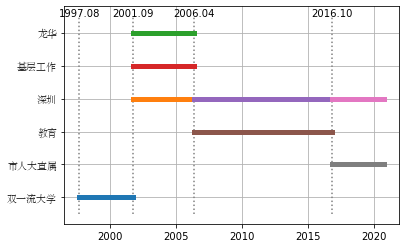

In [23]:
liu = Person('张三')
liu.gender = 'W'
liu.age = 30
#r0 = WorkExperience(time='',labels=[])
r1 = WorkExperience(text='某某大学学习',time='1997.08—2001.09',labels=['双一流大学'])
r2= WorkExperience(text='深圳龙华区公务员',time='2001.09—2006.04',labels=['深圳','龙华','基层工作'])
r3= WorkExperience(text='深圳市党校校长',time='2006.04—2016.10',labels=['深圳','教育'])
r4= WorkExperience(text='深圳市人大代表',time='2016.10—2020.09',labels=['深圳','市人大直属'])
liu.update_resumes([r1,r2,r3,r4])
liu.labelmap()

In [24]:
liu.STD

{'双一流大学': [1492,
  (datetime.date(1997, 8, 1), datetime.date(2001, 9, 1)),
  [[datetime.date(1997, 8, 1), datetime.date(2001, 9, 1)]],
  True,
  False,
  True],
 '市人大直属': [1431,
  (datetime.date(2016, 10, 1), datetime.date(2020, 9, 1)),
  [[datetime.date(2016, 10, 1), datetime.date(2020, 9, 1)]],
  True,
  False,
  True],
 '教育': [3836,
  (datetime.date(2006, 4, 1), datetime.date(2016, 10, 1)),
  [[datetime.date(2006, 4, 1), datetime.date(2016, 10, 1)]],
  True,
  False,
  True],
 '深圳': [6940,
  (datetime.date(2001, 9, 1), datetime.date(2020, 9, 1)),
  [[datetime.date(2001, 9, 1), datetime.date(2006, 4, 1)],
   [datetime.date(2006, 4, 1), datetime.date(2016, 10, 1)],
   [datetime.date(2016, 10, 1), datetime.date(2020, 9, 1)]],
  True,
  False,
  True],
 '基层工作': [1673,
  (datetime.date(2001, 9, 1), datetime.date(2006, 4, 1)),
  [[datetime.date(2001, 9, 1), datetime.date(2006, 4, 1)]],
  True,
  False,
  True],
 '龙华': [1673,
  (datetime.date(2001, 9, 1), datetime.date(2006, 4, 1)),
  [[da

In [27]:
query = {
        'personal':{'gender':'W','age':(20,50)},
        'workexp':{
            #'基层经历':{'Timelen':730,'Period':(datetime.date(2001, 9, 1), datetime.date(2006, 4, 1)),'Now':False},
            '教育':{'Timelen':730,'Now':False}
        }
        }

liu.reply(query)

False

In [28]:
liu.checkbytime(2015,2,3)

['深圳市党校校长', ['深圳', '教育']]